# Understandng Digital Images in Python

This article introduces one of the most important ideas in image processing with Python: **a digital image is nothing more than a NumPy array of numbers**. Once that idea clicks, image processing stops feeling mysterious and starts feeling like applied mathematics with pictures.

---

## What Is a Digital Image, Really?

At its core, a digital image is a grid of pixels. Each pixel is just a number or more 
accurately, a small group of numbers.

- A **grayscale image** stores a single value per pixel (intensity).
- A **color image** usually stores three values per pixel:
  - Red
  - Green
  - Blue

This is known as the **RGB color model**. In some cases, there is a fourth value called 
**alpha**, which controls transparency.

So conceptually:

- Grayscale image → 2D NumPy array  
- Color image → 3D NumPy array `(height × width × 3)`

---

## RGB Values and Everyday Software

If you’ve ever used tools like Microsoft Paint or PowerPoint to pick a custom color, 
you’ve already worked with RGB values just without realizing it.

Examples:

- `(255, 0, 0)` → Pure red  
- `(255, 255, 0)` → Yellow (red + green)  
- `(0, 0, 0)` → Black  
- `(255, 255, 255)` → White  

Each channel typically ranges from **0 to 255**, which leads us directly to image data 
types.

---

## Image Data Types: Why 0–255?

Most images are stored as **8-bit unsigned integers (`uint8`)**.

An 8-bit number can represent:

2⁸ = 256 values → 0 to 255

This is why pixel intensities often live in that range.

Other common image data types include:

- **uint16** → 0 to 65,535 (16-bit images)
- **float** → values typically normalized between 0 and 1

Higher bit-depth images can store more detail, but converting them down (for example, from 16-bit to 8-bit) can permanently lose information.

---

## Loading an Image in Python

When an image is loaded in Python using libraries like **scikit-image**, it becomes a 
NumPy array.

A color image might have a shape like:

(height, width, 3)


For example:

(513, 639, 3)

- The first two dimensions represent spatial location.
- The third dimension represents the RGB channels.

The pixel at the top-left corner is accessed as `(0, 0)`, just like array indexing.

---

In [4]:
from skimage import io

image = io.imread("doplerUS.jpg")
print(image.shape)

(194, 259, 3)


Meaning: 194 pixels tall, 259 wide, and three color channels (Red, Green, Blue).  
To actually see the image (important for morale):

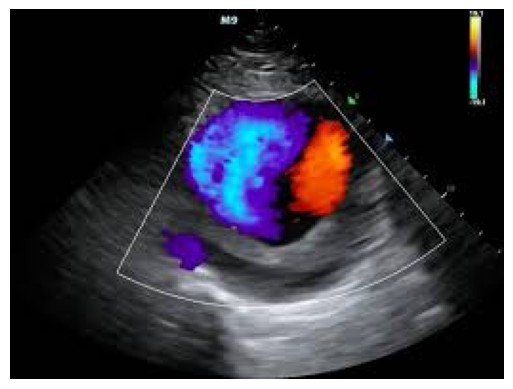

In [5]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis("off")
plt.show()

A few useful subtleties, because reality is slippery:
- scikit-image loads images in RGB order, not BGR (unlike OpenCV).
- The data type is often uint8 (values 0–255), but some operations prefer floats.

---

## Inspecting Pixel Values

Once an image is loaded as a NumPy array, you can:

- Print the array
- Check its data type
- Inspect its minimum and maximum values

For a typical `uint8` image:

- Minimum value → `0`
- Maximum value → `255`

This matches what you see in image tools like ImageJ or Paint.

---

In [9]:
from skimage import io

# Load the image
image = io.imread("doplerUS.jpg")

# Inspect basic properties
print("Shape (Y, X, Channels):", image.shape)
print("Data type:", image.dtype)
print("Min pixel value:", image.min())
print("Max pixel value:", image.max())

# (Optional) peek at raw pixel values
print("\nFirst 5x5 pixels (R channel):")
print(image[:5, :5, 0])

Shape (Y, X, Channels): (194, 259, 3)
Data type: uint8
Min pixel value: 0
Max pixel value: 255

First 5x5 pixels (R channel):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]



## Creating an Image from Scratch

Because images are arrays, you can generate one from scratch using NumPy.

For example, creating a random image produces visual noise. These randomly generated images are often **floating-point 
arrays** with values between `0` and `1`, rather than integers.

This highlights an important idea:

- Images don’t have to come from files  
- Any NumPy array with the right shape can be treated as an image  

---

Shape: (256, 256, 3)
Data type: float64
Min value: 6.419874901575362e-06
Max value: 0.9999992239549892


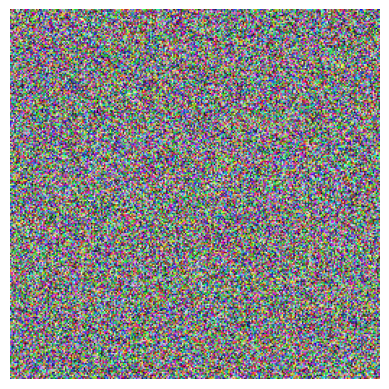

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random color image (height, width, channels)
image = np.random.rand(256, 256, 3)

print("Shape:", image.shape)
print("Data type:", image.dtype)
print("Min value:", image.min())
print("Max value:", image.max())

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

## Converting Between Integer and Floating-Point Images

Image libraries often allow conversion between data types.

For example:

- `uint8` image → values from `0` to `255`
- Converted float image → values scaled to `0` to `1`

Visually, the images look identical. Numerically, they are very different.

This distinction matters when:

- Performing mathematical operations
- Normalizing data for machine learning
- Avoiding overflow or clipping errors

---

Original uint8 image:
dtype: uint8 min: 0 max: 255

Converted float image:
dtype: float64 min: 0.0 max: 1.0

Back to uint8 image:
dtype: uint8 min: 0 max: 255


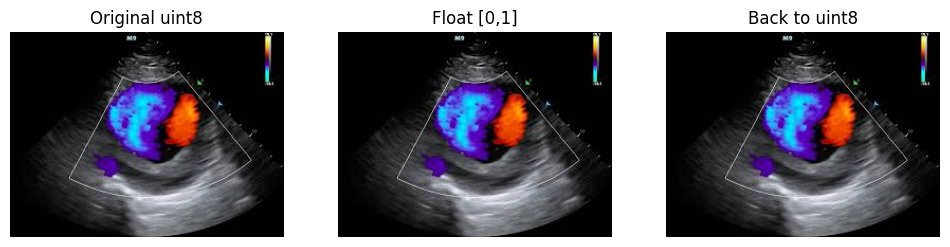

In [11]:
from skimage import io, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

# Load a uint8 image
image_uint8 = io.imread("doplerUS.jpg")
print("Original uint8 image:")
print("dtype:", image_uint8.dtype, "min:", image_uint8.min(), "max:", image_uint8.max())

# Convert to floating point (0.0 - 1.0)
image_float = img_as_float(image_uint8)
print("\nConverted float image:")
print("dtype:", image_float.dtype, "min:", image_float.min(), "max:", image_float.max())

# Convert back to uint8
image_back = img_as_ubyte(image_float)
print("\nBack to uint8 image:")
print("dtype:", image_back.dtype, "min:", image_back.min(), "max:", image_back.max())

# Display side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image_uint8)
axes[0].set_title("Original uint8")
axes[1].imshow(image_float)
axes[1].set_title("Float [0,1]")
axes[2].imshow(image_back)
axes[2].set_title("Back to uint8")
for ax in axes:
    ax.axis("off")
plt.show()


## Doing Math on Images

Since images are NumPy arrays, **all NumPy math applies**.

Examples include:

- Multiplying an image by `0.5` to darken it
- Adding two images together
- Scaling intensities
- Applying thresholds

For instance, multiplying a `uint8` image by `0.5` cuts the maximum intensity roughly in half, turning `255` into about `127`.

This is the foundation of image processing: **pixel-wise math**.

---

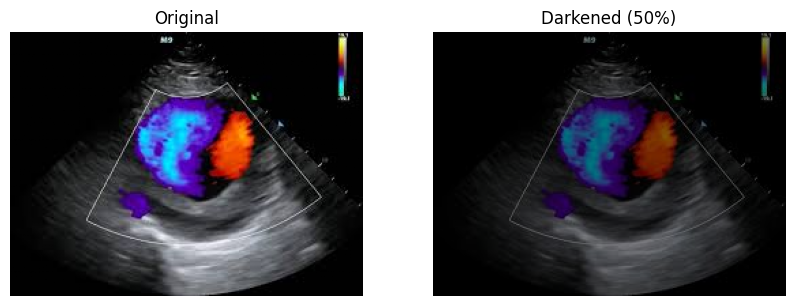

In [12]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt

# Load and convert to float for safe math
image = img_as_float(io.imread("doplerUS.jpg"))

# Darken the image by 50%
darkened = image * 0.5

# Clip values to [0,1] just in case (good habit)
darkened = darkened.clip(0, 1)

# Display original vs darkened
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(darkened)
axes[1].set_title("Darkened (50%)")
for ax in axes:
    ax.axis("off")
plt.show()

## Modifying Specific Regions (Slicing)

You can also modify just part of an image using NumPy slicing.

For example:

- Select a rectangular region
- Replace its pixel values with a solid color

Setting a region to:

- `(255, 0, 0)` → Red box  
- `(255, 255, 0)` → Yellow box  
- `(255, 255, 255)` → White box  

This reinforces a powerful idea:

> **Image editing is array manipulation.**

---

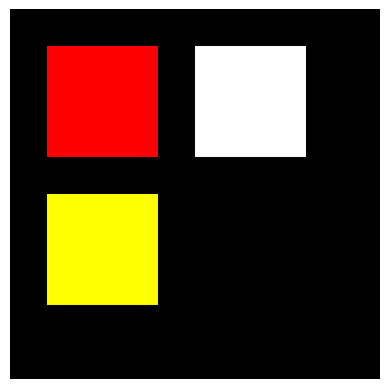

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample image (500x500 pixels with 3 color channels)
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw a red box from (50:200, 50:200)
image[50:200, 50:200] = [255, 0, 0]

# Draw a yellow box from (250:400, 50:200)
image[250:400, 50:200] = [255, 255, 0]

# Draw a white box from (50:200, 250:400)
image[50:200, 250:400] = [255, 255, 255]

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

## Why This Matters

Everything in image processing—filtering, segmentation, enhancement, computer vision, and machine learning—rests on a simple 
truth:

> **Images are just NumPy arrays, and pixels are just numbers.**

Once you’re comfortable with that, advanced topics stop feeling abstract and start feeling logical.

---


## What Comes Next

The next step is exploring **different libraries for loading and manipulating images**, each with its own strengths:

- Simple image I/O
- Advanced image processing
- Machine vision and analysis tools

This foundational understanding makes all of that possible.
